# 排序算法

In [27]:
import random
from copy import copy

to_sort = [4, 2, 9, 5, 8, 6, 1, 7, 3, 6, 8, 1, 2]

In [28]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def get_anim(data, interval=800):
    # data = [(0,1, [1,3,2]), (1,2, [1,2,3])]
    if not data: return None

    _, _, first = data[0]
    x = range(len(first))
    fig = plt.figure()
    rects = plt.bar(x, first, color='c')
    plt.ylim(0, max(first))

    def animate(i):
        a, b, lst = data[i]
        for x in rects:
            x.set_color('c')
        a is not None and rects[a].set_color('g')
        b is not None and rects[b].set_color('r')
        for rect, yi in zip(rects, lst):
            rect.set_height(yi)
        return rects,
   
    anim = animation.FuncAnimation(
        fig, animate, frames=len(data), interval=interval)
    return anim

## 选择排序(Selection)

- 比较次数: $\frac{N^2}{2}$
- 交换次数: $N$

In [29]:
def selection_sort(lst):
    data = [[None, None, copy(lst)]]
    print('(0, 0)', lst)
    for loop in range(len(lst)-1):
        min_ = loop
        for idx in range(loop+1, len(lst)):
            if lst[idx] < lst[min_]:
                min_ = idx
        if loop != min_:
            lst[loop], lst[min_] = lst[min_], lst[loop]
            data.append([loop, min_, copy(lst)])
            print('(%s, %s) %s' % (loop, min_, lst))
    return data

(0, 0) [4, 2, 9, 5, 8, 6, 1, 7, 3, 6, 8, 1, 2]
(0, 6) [1, 2, 9, 5, 8, 6, 4, 7, 3, 6, 8, 1, 2]
(1, 11) [1, 1, 9, 5, 8, 6, 4, 7, 3, 6, 8, 2, 2]
(2, 11) [1, 1, 2, 5, 8, 6, 4, 7, 3, 6, 8, 9, 2]
(3, 12) [1, 1, 2, 2, 8, 6, 4, 7, 3, 6, 8, 9, 5]
(4, 8) [1, 1, 2, 2, 3, 6, 4, 7, 8, 6, 8, 9, 5]
(5, 6) [1, 1, 2, 2, 3, 4, 6, 7, 8, 6, 8, 9, 5]
(6, 12) [1, 1, 2, 2, 3, 4, 5, 7, 8, 6, 8, 9, 6]
(7, 9) [1, 1, 2, 2, 3, 4, 5, 6, 8, 7, 8, 9, 6]
(8, 12) [1, 1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 8]
(11, 12) [1, 1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 8, 9]


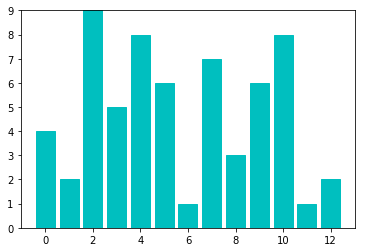

In [30]:
data = selection_sort(copy(to_sort))
anim = get_anim(data)
HTML(anim.to_html5_video())

## 插入排序(Insertion Sort)

- 比较次数: $N$ ~ $\frac{N^2}{4}$ ~ $\frac{N^2}{2}$
- 交换次数: $0$ ~ $\frac{N^2}{4}$ ~ $\frac{N^2}{2}$

In [31]:
def insert_sort(lst):
    data = [[None, None, copy(lst)]]

    print('(0, 0)', lst)
    for i in range(1, len(lst)):
        for idx in range(i, 0, -1):
            if idx-1 < 0:
                continue
            if lst[idx] < lst[idx-1]:
                # print('(%s, %s)' % (lst[idx], lst[idx-1]), end=' ')
                # 下面的算法, 每一次比较都可能导致一次位置交换
                lst[idx], lst[idx-1] = lst[idx-1], lst[idx]
                # print(lst[:i+1])
                data.append([idx, idx-1, copy(lst)])
    return data

(0, 0) [4, 2, 9, 5, 8, 6, 1, 7, 3, 6, 8, 1, 2]


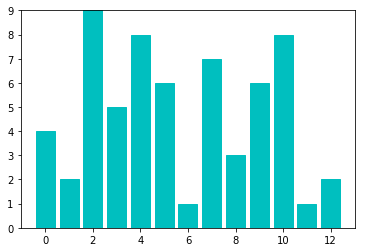

In [32]:
data = insert_sort(copy(to_sort))
anim = get_anim(data)
HTML(anim.to_html5_video())

In [33]:
def insert_sort1(lst):
    data = [[None, None, copy(lst)]]

    print('(0, 0)', lst)
    for i in range(1, len(lst)):
        for idx in range(i-1, -1, -1):
            # 为了尽可能减少不必要的位置交换, 我们一次性找到要插入的位置
            # 为了找到要插入的位置, 甚至可以进一步用二分查找进行优化
            if idx - 1 >= 0:
                # [1, 3, 2] ==> 将2插入1~3之间
                if lst[idx-1] <= lst[i] < lst[idx]:
                    print('(%s, %s)' % (lst[idx], lst[i]), end=' ')
                    lst[idx+1: i+1], lst[idx] = lst[idx: i], lst[i]
                    print(lst[:i+1])
                    data.append([idx, i, copy(lst)])
            else:
                # [1, 3, 0] ==> 将0插入1之前
                if lst[i] < lst[idx]:
                    print('(%s, %s)' % (lst[idx], lst[i]), end=' ')
                    lst[idx+1: i+1], lst[idx] = lst[idx: i], lst[i]
                    print(lst[:i+1])
                    data.append([idx, i, copy(lst)])
    return data

(0, 0) [4, 2, 9, 5, 8, 6, 1, 7, 3, 6, 8, 1, 2]
(4, 2) [2, 4]
(9, 5) [2, 4, 5, 9]
(9, 8) [2, 4, 5, 8, 9]
(8, 6) [2, 4, 5, 6, 8, 9]
(2, 1) [1, 2, 4, 5, 6, 8, 9]
(8, 7) [1, 2, 4, 5, 6, 7, 8, 9]
(4, 3) [1, 2, 3, 4, 5, 6, 7, 8, 9]
(7, 6) [1, 2, 3, 4, 5, 6, 6, 7, 8, 9]
(9, 8) [1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 9]
(2, 1) [1, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 9]
(3, 2) [1, 1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 8, 9]


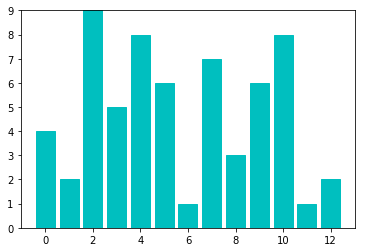

In [34]:
data = insert_sort1(copy(to_sort))
anim = get_anim(data)
HTML(anim.to_html5_video())

## 希尔排序(Shell Sort)

https://zh.wikipedia.org/wiki/%E5%B8%8C%E5%B0%94%E6%8E%92%E5%BA%8F

>例如，假设有这样一组数[13 14 94 33 82 25 59 94 65 23 45 27 73 25 39 10]，如果我们以步长为5开始进行排序，我们可以通过将这列表放在有5列的表中来更好地描述算法，这样他们就应该看起来是这样：

>13 14 94 33 82<br>
25 59 94 65 23<br>
45 27 73 25 39<br>
10

>然后我们对每列进行排序：

>10 14 73 25 23<br>
13 27 94 33 39<br>
25 59 94 65 82<br>
45

>将上述四行数字，依序接在一起时我们得到：[10 14 73 25 23 13 27 94 33 39 25 59 94 65 82 45]. 这时10已经移至正确位置了，然后再以3为步长进行排序, 重复同样的步骤... 最后以1为步长进行排序(普通的插入排序), 即可得到排序后的结果

- 时间复杂度: 达不到 $N^2$

In [35]:
def shell_sort(lst):
    data = [[None, None, copy(lst)]]

    n = len(lst)
    step = n // 2

    while step > 0:
        # 循环步长, 也即每一列需要循环处理一下
        for i in range(0, step):
            # 对每一列进行插入排序
            for j in range(step+i, n, step):
                for k in range(j, 0, -step):
                    if k-step < 0 or lst[k] >= lst[k-step]:
                        continue
                    lst[k], lst[k-step] = lst[k-step], lst[k]
                    data.append([k, k-step, copy(lst)])

        step = step // 2  # 步长减半

    return data

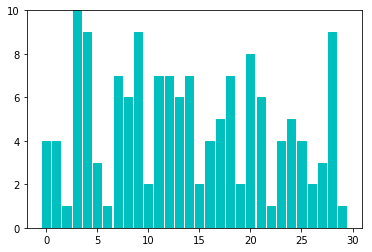

In [36]:
l = [4,4,1,10,9,3,1,7,6,9,2,7,7,6,7,2,4,5,7,2,8,6,1,4,5,4,2,3,9,1]
data = shell_sort(l)
anim = get_anim(data, 300)
HTML(anim.to_html5_video())

## 归并排序(Merge Sort)

- 时间复杂度: $NlgN$
- 空间复杂度: $N$

In [37]:
# 将给定列表中的 lst[lo:mid], lst[mid:hi] 归并

def copy_merge(lo, mid, hi, lst, data=None):
    """归并, <<算法>> P170中的实现, 不足之处是需要一个辅助列表"""

    # 此处每次都创建一个coppied列表, 实际上可以在整个归并排序中
    # 创建一个总的列表, 以避免每次创建列表带来的时间/空间开销
    coppied = lst[lo: hi]
    i, j = lo, mid
    # print('lo mid hi', lo, mid, hi, coppied)
    for x in range(lo, hi):
        # print('x i j', x, i, j)
        if i >= mid:
            lst[x], j = coppied[j-lo], j+1
        elif j >= hi:
            lst[x], i = coppied[i-lo], i+1
        elif coppied[j-lo] < coppied[i-lo]:
            lst[x], j = coppied[j-lo], j+1
        else:
            lst[x], i = coppied[i-lo], i+1


def in_suit_merge(lo, mid, hi, lst, data=None):
    """原位归并, 不需要辅助列表, 但是会增加比较和交换次数"""

    for i in range(lo, mid):
        need_sort = False
        # 左边列表第i个大于右边第0个, 交换
        if lst[i] > lst[mid]:
            lst[i], lst[mid] = lst[mid], lst[i]
            data and data.append([i, mid, copy(lst)])
            try:
                need_sort = lst[mid] > lst[mid+1]
            except IndexError:
                need_sort = False

        if not need_sort: continue

        # 交换后需要重新对 lst[mid:hi] 进行排序
        for j in range(mid+1, hi):
            if lst[j] > lst[mid]:
                # 插入排序
                lst[mid: j-1], lst[j-1] = lst[mid+1: j], lst[mid]
                need_sort = False
                data and data.append([mid, j, copy(lst)])
                break

        # 说明 lst[mid] 比 lst[mid+1:hi] 的任何一个都大
        if need_sort:
            lst[mid: hi-1], lst[hi-1] = lst[mid+1: hi], lst[mid]
            data and data.append([mid, hi-1, copy(lst)])

In [38]:
def merge_sort(lst, merge, data=None):
    """自底向顶归并排序"""
    step = 1
    n = len(lst)
    while step < n:
        # print('step:', step)
        for i in range(0, n, 2*step):
            lo, mid, hi = i, i+step, i+2*step
            if mid >= n: break
            if hi >= n: hi = n
            # print('A %2s %2s %2s %s' % (lo, mid, hi, lst))
            merge(lo, mid, hi, lst, data)
            # print('B %2s %2s %2s %s' % (lo, mid, hi, lst))
        step *= 2


def recursive_merge_sort(lo, hi, lst, merge):
    """自顶向下(递归)归并排序, <<算法>> P171

    .. note::
        递归排序的不足是会产生大量递归调用, 可以在子列表长度较小时,
        使用插入排序/选择排序(这两种方法应该在小列表上工作的更好).
    """
    if hi-lo == 1: return  # 当切片中只有一个元素时, 返回
    mid = lo + (hi-lo)/2
    recursive_merge_sort(lo, mid, lst, merge)
    recursive_merge_sort(mid, hi, lst, merge)
    merge(lo, mid, hi, lst)

In [39]:
l0 = [4,4,1,10,9,3,1,7,6,9,2,7,7,6,7,2,4,5,7,2,8,6,1,4,5,4,2,3,9,1]
merge_sort(l0, copy_merge)
print(','.join(str(x) for x in l0))

l1 = [4,4,1,10,9,3,1,7,6,9,2,7,7,6,7,2,4,5,7,2,8,6,1,4,5,4,2,3,9,1]
recursive_merge_sort(0, len(l1), l1, copy_merge)
print(','.join(str(x) for x in l1))

l2 = [4,4,1,10,9,3,1,7,6,9,2,7,7,6,7,2,4,5,7,2,8,6,1,4,5,4,2,3,9,1]
anim_data_l2 = [[None, None, copy(l2)]]
merge_sort(l2, in_suit_merge, anim_data_l2)
print(','.join(str(x) for x in l2))

1,1,1,1,2,2,2,2,3,3,4,4,4,4,4,5,5,6,6,6,7,7,7,7,7,8,9,9,9,10


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
anim_l2 = get_anim(anim_data_l2, 100)
HTML(anim_l2.to_html5_video())

In [ ]:
def test_merge(n=100):
    for x in range(n):
        l3 = [random.randrange(0, 30) for i in range(100)]
        l3_1, l3_2, l3_3 = copy(l3), copy(l3), copy(l3)
        merge_sort(l3_1, copy_merge)
        merge_sort(l3_2, in_suit_merge)
        recursive_merge_sort(0, len(l3_3), l3_3, copy_merge)
        assert l3_1 == l3_2
        assert l3_1 == l3_3

test_merge()

## 桶排序(Bucket Sort)

## 快排(Quick Sort)